# Chess - Data Visualization and Logistic Regression Project 

## Notebook Preparation

In [5]:
# Import Libraries
#System
import os 

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'

### Standarizing Visualizations

In [135]:
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
set_sns_format(width=14, height=8)

C:\Users\ssai\AppData\Local\Temp\ipykernel_26324\4092768460.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [7]:
# Adding  datapoints values to line or bar plots

def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)

## Dataset Discovery

In [212]:
# Load Dataset
df = pd.read_csv('c:\\Users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\archive\\games.csv')

In [213]:
df.shape # 20058 Rows - 16 Columns

(20058, 16)

In [214]:
df.info() #Columns Name and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [215]:
#Detect NaN values
df.isna().sum() #The dataset contains 0 NaN Values

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [216]:
#Describe numerical variables.
df.describe() #Created_at and last_move_at are Dates. 

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [217]:
# Describe all columns of the Dataset

df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,20058,20058,2.005800e+04,2.005800e+04,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


In [218]:
# Number of unique Categorical Values by column
pd.DataFrame(df.describe(include='all').iloc[1]).dropna()

,unique
id,19113
rated,2
victory_status,4
winner,3
increment_code,400
white_id,9438
black_id,9331
moves,18920
opening_eco,365
opening_name,1477


In [219]:
# Duplicated Rows

print('Number of rows ' + str(df.shape[0]))

print('Number of duplicated rows ' + str(df.duplicated().value_counts()[1]))

#Remove duplicated in the DataFrame
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

print('Number of rows after removing duplicated rows ' + str(df.shape[0]))


Number of rows 20058
Number of duplicated rows 429
Number of rows after removing duplicated rows 19629


In [220]:
# Check Duplicated rowws by subset ()
print('Number of rows ' + str(df.shape[0]))
print('Number of rows by subset: ID, White ID, Black ID Moves and Turns ' + str(df.duplicated(subset=['id', 'white_id', 'black_id', 'moves', 'turns']).value_counts()[1]))
#Remove duplicated in the DataFrame
df.drop_duplicates(subset=['id', 'white_id', 'black_id', 'moves', 'turns'], keep='first', inplace=True, ignore_index=False)
print('Number of rows after removing duplicated rows ' + str(df.shape[0]))


Number of rows 19629
Number of rows by subset: ID, White ID, Black ID Moves and Turns 516
Number of rows after removing duplicated rows 19113


In [222]:
print(f'Number of rows reomved {20058-19113}')

Number of rows reomved 945


## DateTime - Convert columns Created_at & Last_move_at

In [223]:
df.head(2) #Display 2 first rows of the Dataset

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [224]:
print('Epoch timestamp: '+str(df['created_at'][2])) #Display the value of the Column created_at in row with index 0

Epoch timestamp: 1504130000000.0


In [225]:
print('Epoch timestamp: '+str(df['last_move_at'][2])) #Display the value of the Column last_move_at in row with index 0

Epoch timestamp: 1504130000000.0


In [226]:
(df['created_at'] == df['last_move_at']).value_counts() #Checking if the values in created_at and last_move_at are the same. 8533 rows have the same created_at and last_move_at as value.

False    10580
True      8533
dtype: int64

In [227]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [228]:
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [229]:
df.head(2)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


## Column Analysis

### ID

In [246]:
#Checking ID as unique Identifier by Game.
display(df.shape[0]) 
display(df['id'].nunique()) 

19113

19113

### Rated

In [103]:
df['rated'].dtype # True | False Column

dtype('bool')

In [134]:
df['rated'].value_counts()# 16155 Matchs rated | 3903 matches not rated 

True     16155
False     3903
Name: rated, dtype: int64

In [99]:
df['rated'].value_counts(normalize=True) # Perentage of True and False

True     0.805414
False    0.194586
Name: rated, dtype: float64

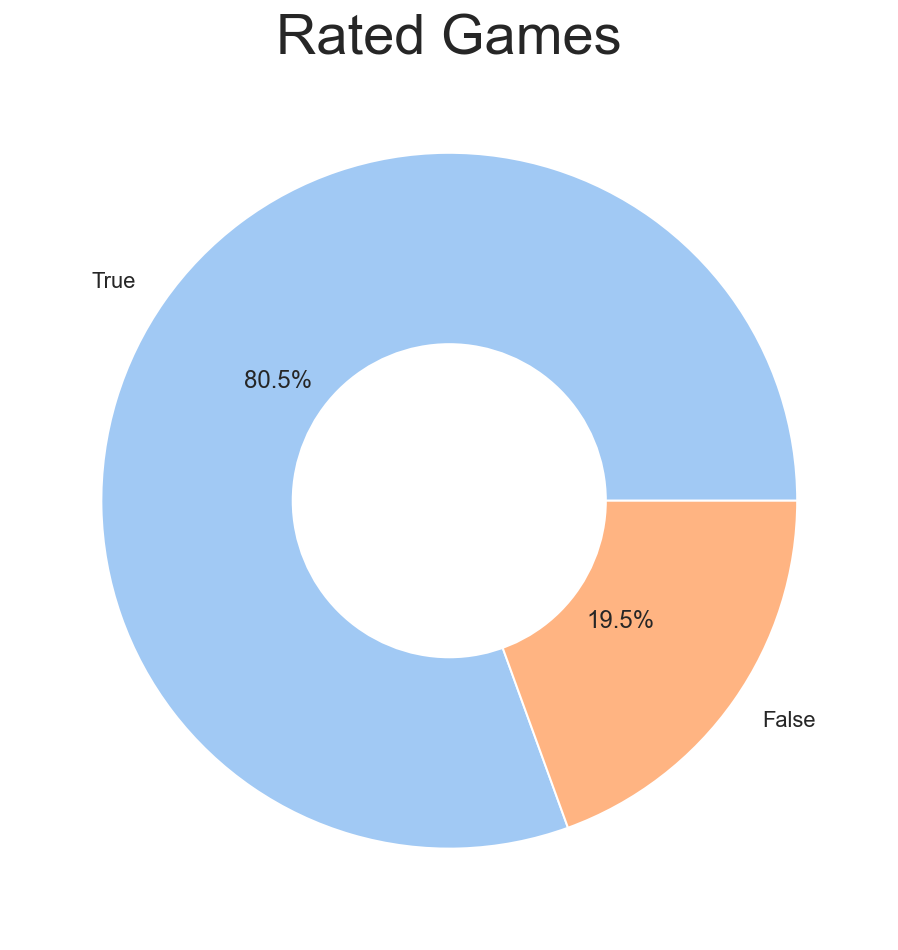

In [133]:
# create data
labels = ['True', 'False']
values = df['rated'].value_counts().to_list()
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.45, color='white')

# Give color names
plt.pie(values, labels=labels, autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Rated Games', fontsize=28)


# Show the graph
plt.show()

### created_at

In [247]:
df['created_at'].max() #Last game in the dataset started on 2017-09-04

Timestamp('2017-09-04 02:45:43.790000128')

In [248]:
df['created_at'].min() #First game in the dataset started on 2013-08-17

Timestamp('2013-08-17 20:33:53.172999936')

In [266]:
#Create a separate column for years
df['created_at_year'] = pd.to_datetime(df['created_at_year']).dt.strftime("%Y")

In [285]:
#Games per year Table
df.groupby(df['created_at_year'])['id'].count()

created_at_year
2013       53
2014     1180
2015     1222
2016     3570
2017    13088
Name: id, dtype: int64

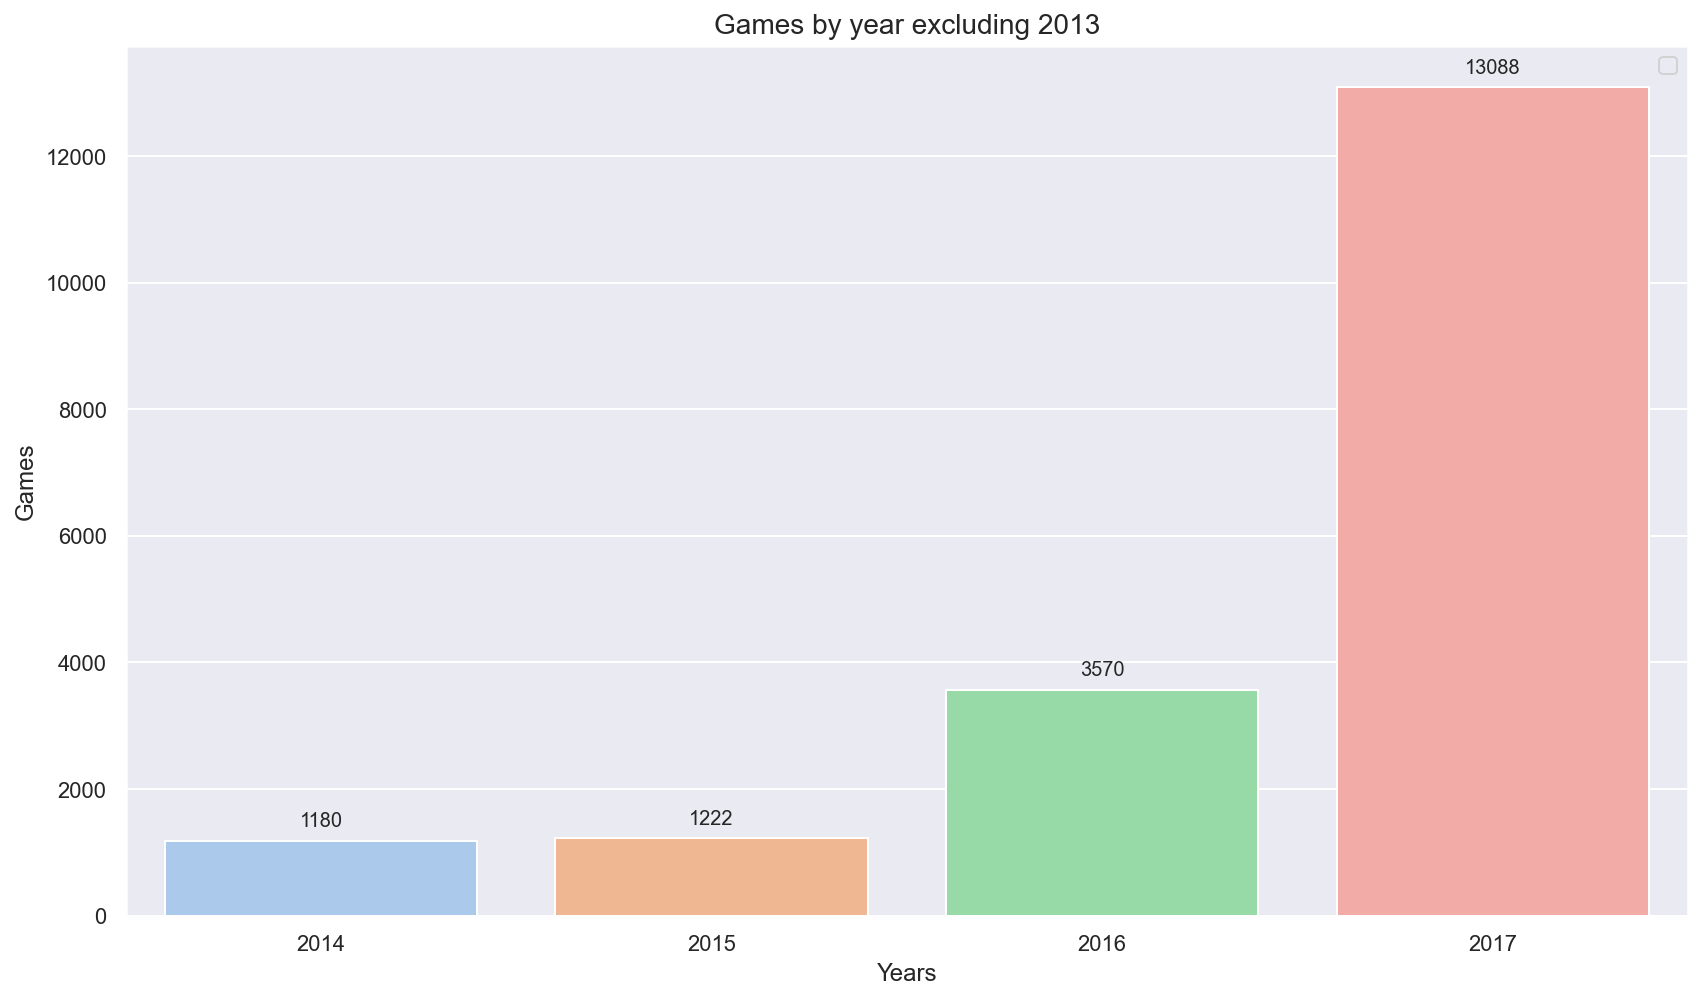

In [284]:
#BarPlot
#Create data for being plotted
ax = sns.barplot(x=df.groupby(df['created_at_year'])['id'].count()[1:].index, y=df.groupby(df['created_at_year'])['id'].count()[1:].values)
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the x - y axis
ax.set_ylabel('Games')
ax.set_xlabel('Years')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Games by year excluding 2013', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()